In [1]:
# importing all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
warnings.simplefilter('ignore')

In [3]:
# Read the data from CSV files
data = pd.read_csv('zomato.csv', encoding='latin1')
Ccode = pd.read_csv('Country-Code.csv')

In [4]:
# Create a dictionary to map country codes to country names
tomap = dict(zip(Ccode['Country Code'], Ccode['Country']))

In [5]:
# Mapping the country name
data['Country_name'] = data['Country Code'].map(tomap)

In [6]:
# Filtering the India data
data = data[data['Country_name'] == 'India'].reset_index(drop=True)

In [7]:
# Read the data from CSV files
statedf=pd.read_csv('state-city.csv')
# Create a dictionary to map country codes to country names
tomap2 = dict(zip(statedf['City'], statedf['State']))
# Mapping the state name
data['state'] = data['City'].map(tomap2)

In [8]:
data['state'].unique()

array(['Uttar Pradesh', 'Gujarat', 'Punjab', 'Maharashtra', 'Karnataka',
       'Madhya Pradesh', 'Odisha', 'Chandigarh', 'Tamil Nadu',
       'Uttarakhand', 'Haryana', 'Goa', 'Assam', 'Telangana', 'Rajasthan',
       'Kerala', 'West Bengal', 'Delhi', 'Bihar', 'Puducherry',
       'Jharkhand', 'Andhra Pradesh'], dtype=object)

In [9]:
data[data['state']=='Uttar Pradesh']['City'].unique()

array(['Agra', 'Allahabad', 'Ghaziabad', 'Kanpur', 'Lucknow', 'Noida',
       'Varanasi'], dtype=object)

In [10]:
data[data['City']=='Allahabad']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_name,state
41,2400020,Aryan Family's Delight,1,Allahabad,"Ground Floor, Vinayak City Centre, Sardar Pate...",Civil Lines,"Civil Lines, Allahabad",81.834502,25.454648,"North Indian, South Indian, Fast Food",...,No,No,No,3,3.4,Orange,Average,57,India,Uttar Pradesh
42,2400148,Bean Here,1,Allahabad,"Vinayak Pushp, 77 Elgin Road, Near Florista, C...",Civil Lines,"Civil Lines, Allahabad",81.833167,25.453436,"Cafe, Fast Food",...,No,No,No,2,3.3,Orange,Average,76,India,Uttar Pradesh
43,2400019,Bikanerwala,1,Allahabad,"2A, JMD Bhawan, Strachey Road, Civil Lines, Al...",Civil Lines,"Civil Lines, Allahabad",81.832616,25.451517,"North Indian, Street Food, Fast Food",...,No,No,No,3,3.2,Orange,Average,51,India,Uttar Pradesh
44,2400193,Dewsis,1,Allahabad,"2, MG Marg, Opposite Hanuman Mandir, Civil Lin...",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,3,3.4,Orange,Average,99,India,Uttar Pradesh
45,2400027,Friends Forever,1,Allahabad,"13/13, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.835585,25.457687,"North Indian, Chinese",...,No,No,No,3,3.4,Orange,Average,83,India,Uttar Pradesh
46,17960073,Hotel Ravisha Continental,1,Allahabad,"57 A, Purshottamdas Tandon Marg, Civil Lines, ...",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, South Indian, Chinese",...,No,No,No,3,3.4,Orange,Average,18,India,Uttar Pradesh
47,2400119,KFC,1,Allahabad,"P Square Mall, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.839744,25.449659,"American, Fast Food",...,No,No,No,3,3.4,Orange,Average,58,India,Uttar Pradesh
48,2400014,McDonald's,1,Allahabad,"Shop 4, 34-B, M G Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.834279,25.450329,Fast Food,...,No,No,No,2,3.3,Orange,Average,53,India,Uttar Pradesh
49,2400403,Pind Balluchi,1,Allahabad,"5-A, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,3,3.2,Orange,Average,6,India,Uttar Pradesh
50,2400349,Pizza Hut,1,Allahabad,"31/31, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"Italian, Pizza",...,No,No,No,3,3.4,Orange,Average,35,India,Uttar Pradesh


In [11]:
# Selecting useful columns for restaurant recommendation
df = data[['Restaurant Name', 'Address', 'City','state', 'Cuisines', 'Rating text', 'Locality']]

In [12]:
# Aggregation and summary statistics
for column in df.columns:
    column_counts = df[column].value_counts()  # Count of each category
    column_percentages = df[column].value_counts(normalize=True) * 100  # Percentage of each category
    
    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Count': column_counts,
        'Percentage': column_percentages
    })
    
    # Display summary statistics
    print(f"Summary statistics for '{column}':")
    print(summary_df)
    print()

Summary statistics for 'Restaurant Name':
                          Count  Percentage
Cafe Coffee Day              83    0.959316
Domino's Pizza               79    0.913084
Subway                       63    0.728155
Green Chick Chop             51    0.589459
McDonald's                   48    0.554785
...                         ...         ...
Sona Pure Veg Paradise        1    0.011558
Dimcha                        1    0.011558
Duke's Pastry Shop            1    0.011558
Stabbers                      1    0.011558
Flying Spaghetti Monster      1    0.011558

[6604 rows x 2 columns]

Summary statistics for 'Address':
                                                    Count  Percentage
Dilli Haat, INA, New Delhi                             11    0.127138
Sector 41, Noida                                       11    0.127138
Greater Kailash (GK) 1, New Delhi                      10    0.115580
The Imperial, Janpath, New Delhi                        9    0.104022
Food Court, 3rd Floo

Word Cloud for 'Restaurant Name':


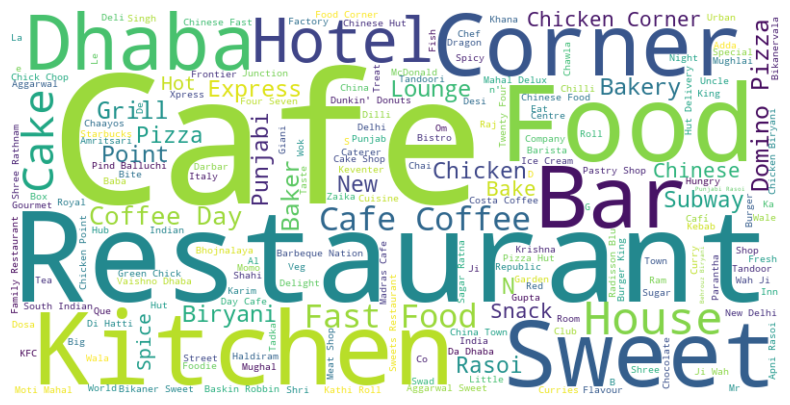

Word Cloud for 'Address':


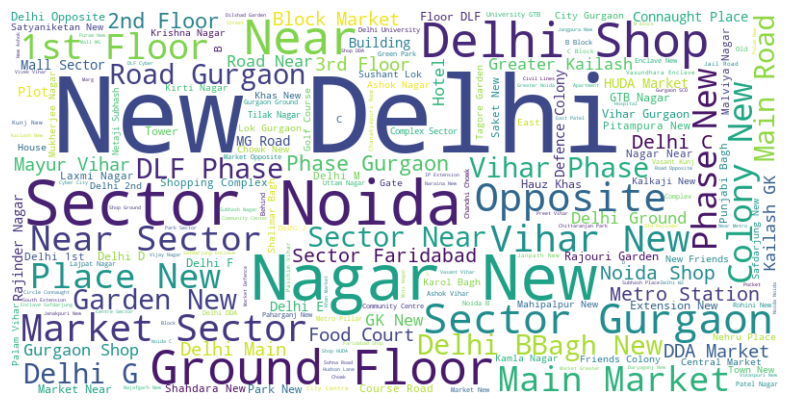

Word Cloud for 'City':


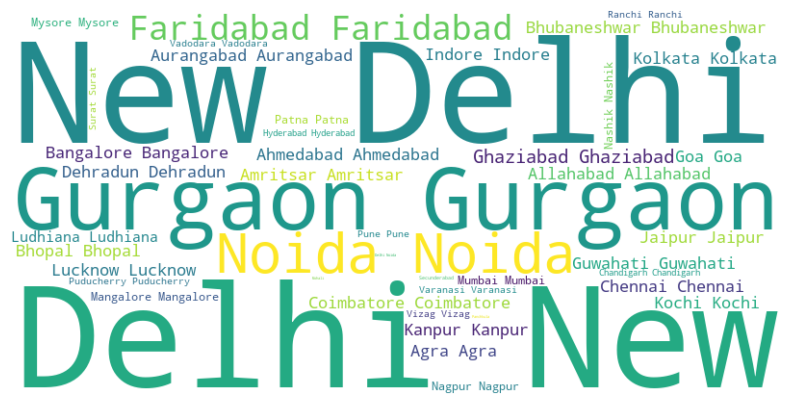

Word Cloud for 'state':


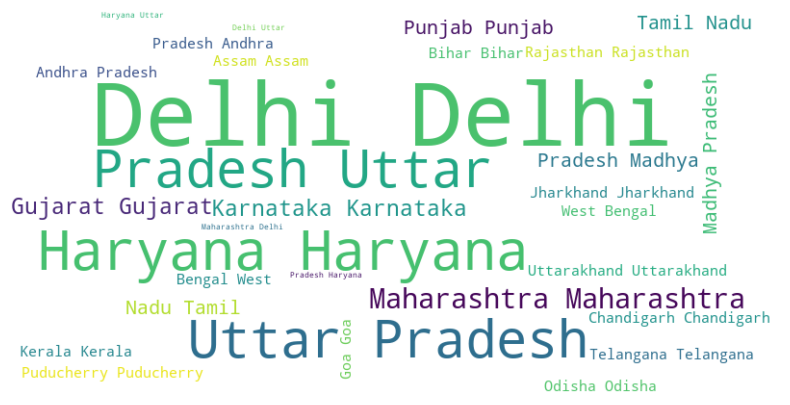

Word Cloud for 'Cuisines':


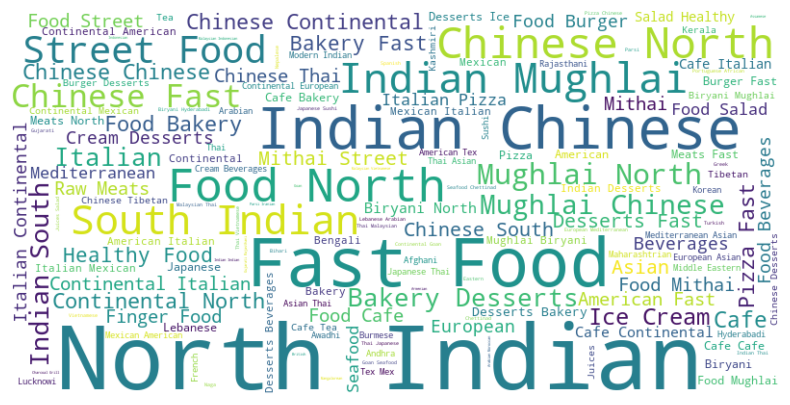

Word Cloud for 'Rating text':


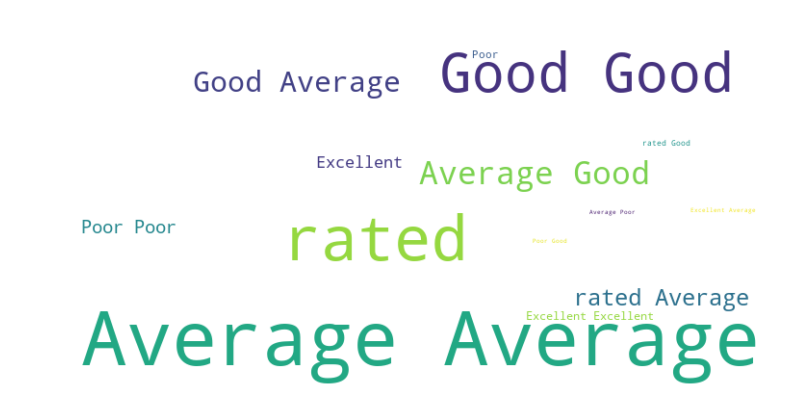

Word Cloud for 'Locality':


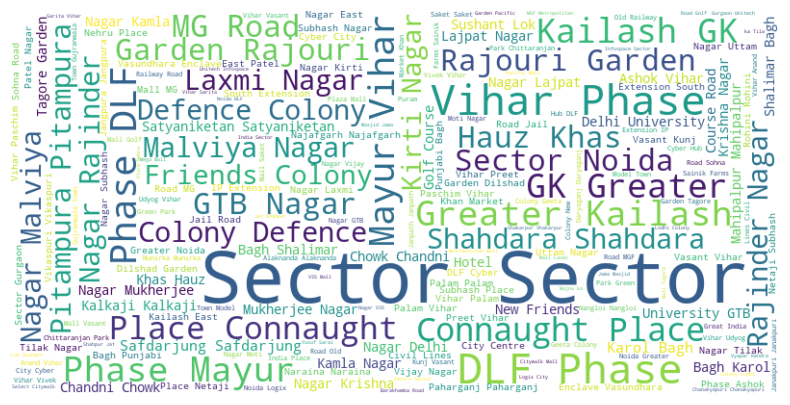

In [13]:
# Word cloud visualization
for column in df.columns:
    print(f"Word Cloud for '{column}':")
    # Extract the values from the column and convert to a list
    values = df[column].dropna().tolist()

    # Concatenate the values into a single string
    text = ' '.join(values)

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

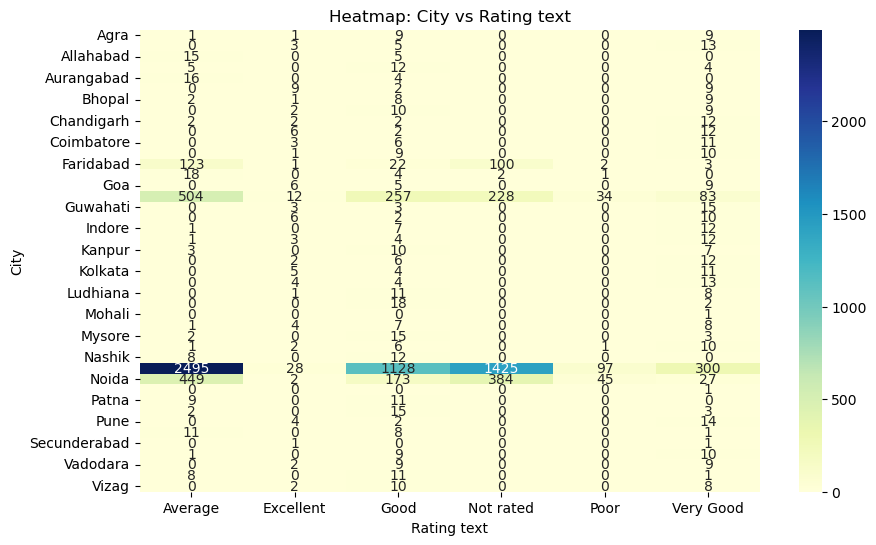

In [14]:
# Heatmap visualization
cross_tab = pd.crosstab(df['City'], df['Rating text'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: City vs Rating text')
plt.xlabel('Rating text')
plt.ylabel('City')
plt.show()

In [15]:
# Perform text preprocessing
# Splitting the text columns into individual words
data['City'] = data['City'].apply(lambda x: x.split())
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split())
data['Rating text'] = data['Rating text'].apply(lambda x: x.split())
data['Locality'] = data['Locality'].apply(lambda x: x.split())

# Combine the preprocessed columns into a single 'tags' column
data['tags'] = data['Cuisines'] + data['City'] + data['Locality'] + data['Rating text']

# Convert the 'tags' column back to a string
data['tags'] = data['tags'].apply(lambda x: " ".join(x))

# Convert the 'tags' column to lowercase
data['tags'] = data['tags'].apply(lambda x: x.lower())

In [16]:
# Drop unnecessary columns
data.drop(columns=['City', 'Cuisines', 'Locality', 'Rating text'], inplace=True)

In [17]:
# Perform stemming on text data
from nltk.stem.porter import PorterStemmer
# Create an instance of PorterStemmer
ps = PorterStemmer()

# Function to apply stemming to a text
def stem(text):
    stemmed_words = []
    
    # Split the text into individual words
    for word in text.split():
        # Apply stemming to each word and add it to the list
        stemmed_words.append(ps.stem(word))
    
    # Join the stemmed words back into a single string
    return " ".join(stemmed_words)

In [18]:
data['tags'] = data['tags'].apply(stem)

In [19]:
# Remove stop words using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
# max_features specifies the maximum number of features (words) to keep
# stop_words='english' removes common English words (e.g., 'the', 'and', 'is')
cv = CountVectorizer(max_features=500, stop_words='english')

# Convert the 'tags' column into a matrix of word counts
vectors = cv.fit_transform(data['tags']).toarray()

In [20]:
# Get the feature names
feature_names = cv.get_feature_names_out()

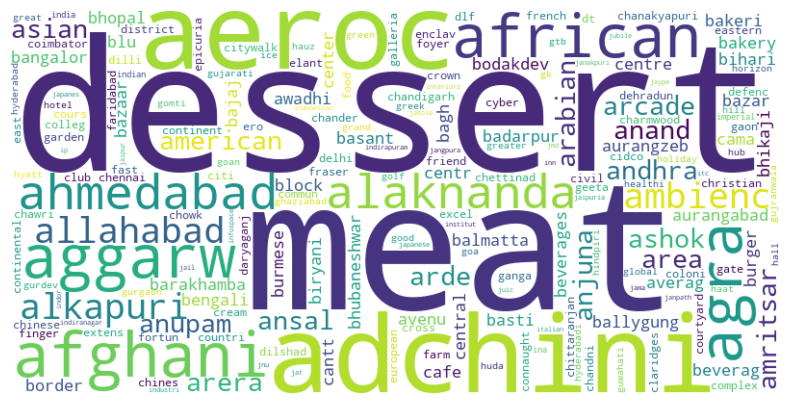

In [21]:
# Concatenate the values into a single string
text = ' '.join(feature_names)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

def top4_resta(restaurent):
    index = data[data['Restaurant Name'] == restaurent].index[0]
    n = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    l_index = []
    count = 0
    
    for i in n:
        if count < 6:
            l_index.append(i[0])
            count += 1
    
    l_index = l_index[1:]
    
    rest = []
    for i in l_index:
        rest.append(data.loc[i]['Restaurant Name'])
    
    return rest

In [23]:
similarity

array([[1.        , 1.        , 0.94280904, ..., 0.13608276, 0.35355339,
        0.16666667],
       [1.        , 1.        , 0.94280904, ..., 0.13608276, 0.35355339,
        0.16666667],
       [0.94280904, 0.94280904, 1.        , ..., 0.14433757, 0.375     ,
        0.1767767 ],
       ...,
       [0.13608276, 0.13608276, 0.14433757, ..., 1.        , 0.28867513,
        0.61237244],
       [0.35355339, 0.35355339, 0.375     , ..., 0.28867513, 1.        ,
        0.35355339],
       [0.16666667, 0.16666667, 0.1767767 , ..., 0.61237244, 0.35355339,
        1.        ]])

In [24]:
top4_resta('Desire Foods')

['Snax Points', 'Rakheja Bakery', 'Momo-Cha', 'China Hot Pot', 'Oregano India']

In [25]:
df.reset_index(drop=True,inplace=True)

In [26]:
df[df['Restaurant Name']=="Momo-Cha"]

,Restaurant Name,Address,City,state,Cuisines,Rating text,Locality
270,Momo-Cha,"Crown Plaza Mall, Sector 15, Faridabad",Faridabad,Haryana,Fast Food,Average,"Crown Plaza Mall, Sector 15, Faridabad"
289,Momo-Cha,"J-121, Near Lean Wolf Gym, Sector 10, Faridabad",Faridabad,Haryana,"North Indian, Chinese",Average,Sector 10
315,Momo-Cha,"87, Near City Chemist, Sector 15, Faridabad",Faridabad,Haryana,"Chinese, Fast Food",Average,Sector 15
356,Momo-Cha,"31, Near HDFC Bank ATM, Sector 17 Market, Sect...",Faridabad,Haryana,"North Indian, Chinese",Average,Sector 17


In [27]:
import pickle

In [28]:
pickle.dump(df,open('newdata.pkl','wb'))

In [29]:
pickle.dump(similarity,open('similarity.pkl','wb'))